In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# 1.WKT数据格式

In [2]:
Point(0,0).wkt

'POINT (0 0)'

In [3]:
Point(0,0).wkb

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

## shapely.wkb.dumps(ob)

### 返回几何对象的WKB表达。

## shapely.wkb.loads(wkb)

### 从WKB表达返回一个几何对象。

In [4]:
from shapely import wkb

pt = Point(0,0)

In [5]:
wkb.dumps(pt)

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [6]:
pt.wkb

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [7]:
wkb.loads(pt.wkb).wkt

'POINT (0 0)'

## shapely.wkt.dumps(ob)

### 返回几何对象的WKT表达。有几个关键字参数可以用来改变返回的WKT，更多细节请参见文档说明。

## shapely.wkt.loads(wkt)

### 从WKT表达返回一个几何对象。

In [8]:
from shapely import wkt

pt = Point(0, 0)

In [9]:
thewkt = wkt.dumps(pt)
thewkt

'POINT (0.0000000000000000 0.0000000000000000)'

In [10]:
pt.wkt

'POINT (0 0)'

In [11]:
wkt.dumps(pt , trim=True)

'POINT (0 0)'

# 2.Numpy和Python数组

In [12]:
import numpy as np

np.asarray(Point(0,0).coords)

array([[0., 0.]])

In [13]:
np.asarray(LineString([(0,0) , (1,1)]).coords)

array([[0., 0.],
       [1., 1.]])

### 通过xy属性，同种类型的几何对象的坐标可以作为标准的Python的x、y值数组。

In [14]:
Point(0,0).xy

(array('d', [0.0]), array('d', [0.0]))

In [15]:
LineString([(0,0) , (1,1)]).xy

(array('d', [0.0, 1.0]), array('d', [0.0, 1.0]))

# 3.Python地理接口

## shapely.geometry.shape(context)

### 返回一个新的、独立的几何对象，其坐标是从context中复制的。

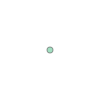

In [16]:
from shapely.geometry import shape

data = {"type":"Point" , "coordinates":(0,0)}

geom = shape(data)
geom

In [17]:
geom.geom_type

'Point'

In [18]:
list(geom.coords)

[(0.0, 0.0)]

### 进一步说明：

In [19]:
# 首先建立一个GeoThing类，这个类接收字典参数，并通过 __geo_interface__ 属性返回。
class GeoThing:
    def __init__(self , d):
        self.__geo_interface__ = d

In [20]:
# 进行实例化，生成 thing 对象
thing = GeoThing({"type":"Point" , "coordinates":(0,0)})

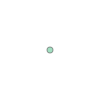

In [21]:
# 通过 shape()函数进行转换
geom = shape(data)
geom

In [22]:
geom.geom_type

'Point'

In [23]:
list(geom.coords)

[(0.0, 0.0)]

## shapely.geometry.mapping(ob)

### 从一个几何体或任何实现__geo_interface__的对象中返回一个类似GeoJSON的映射。

### 例如，使用相同的GeoThing类：

In [24]:
from shapely.geometry import mapping

thing = GeoThing({"type": "Point", "coordinates": (0.0, 0.0)})

In [25]:
m = mapping(thing)
m

{'type': 'Point', 'coordinates': (0.0, 0.0)}

In [26]:
m["type"]

'Point'

In [27]:
m["coordinates"]

(0.0, 0.0)